# Global Pollution Analysis and Energy Recovery
Classification Assignment

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:

df = pd.read_csv("Global_Pollution_Analysis.csv")
df.head()


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [5]:
df.isnull().sum()

num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


In [6]:
pollution_score = (
    df['Air_Pollution_Index'] +
    df['Water_Pollution_Index'] +
    df['Soil_Pollution_Index'] +
    df['CO2_Emissions (in MT)']
)

df['Pollution_Severity'] = pd.qcut(
    pollution_score,
    q=3,
    labels=['Low', 'Medium', 'High']
)

df[['Pollution_Severity']].head()


,Pollution_Severity
0,High
1,Low
2,Low
3,High
4,Medium


In [7]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Pollution_Severity'] = le.fit_transform(df['Pollution_Severity'])


In [8]:
features = [
    'Air_Pollution_Index',
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'Industrial_Waste (in tons)',
    'Energy_Recovered (in GWh)',
    'CO2_Emissions (in MT)',
    'Renewable_Energy (%)',
    'Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)',
    'Population (in millions)',
    'GDP_Per_Capita (in USD)'
]

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


In [12]:
X = df[features]
y = df['Pollution_Severity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.80      1.00      0.89        12
           2       0.85      0.58      0.69        19

    accuracy                           0.75        40
   macro avg       0.74      0.79      0.75        40
weighted avg       0.77      0.75      0.74        40



In [14]:
acc = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, knn.predict(X_test)))

best_k = acc.index(max(acc)) + 1
best_k


7

In [15]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.53      0.89      0.67         9
           1       0.69      0.92      0.79        12
           2       0.78      0.37      0.50        19

    accuracy                           0.65        40
   macro avg       0.67      0.72      0.65        40
weighted avg       0.70      0.65      0.62        40



In [16]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.77      0.83      0.80        12
           2       0.81      0.68      0.74        19

    accuracy                           0.75        40
   macro avg       0.74      0.77      0.75        40
weighted avg       0.76      0.75      0.75        40



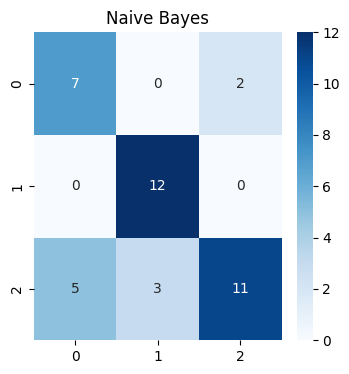

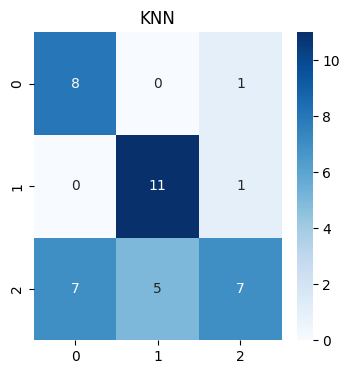

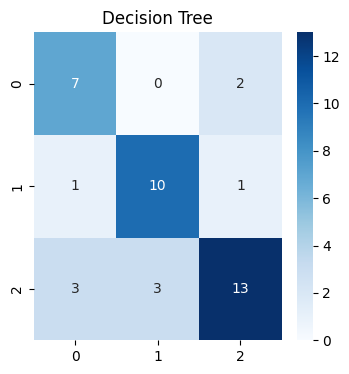

In [17]:
models = {
    "Naive Bayes": y_pred_nb,
    "KNN": y_pred_knn,
    "Decision Tree": y_pred_dt
}

for name, preds in models.items():
    plt.figure(figsize=(4,4))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.show()


### High pollution severity strongly correlates with:
- CO2 emissions
- Industrial waste
- Low renewable energy usage

Decision Tree offers best interpretability for policy decisions.

